In [ ]:
import pandas as pd
from sklearn.datasets import load_wine

# Load the dataset
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['quality'] = wine_data.target

In [3]:
# Examine data types, dimensions, and missing values
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Check for class imbalance
print(df['quality'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  quali

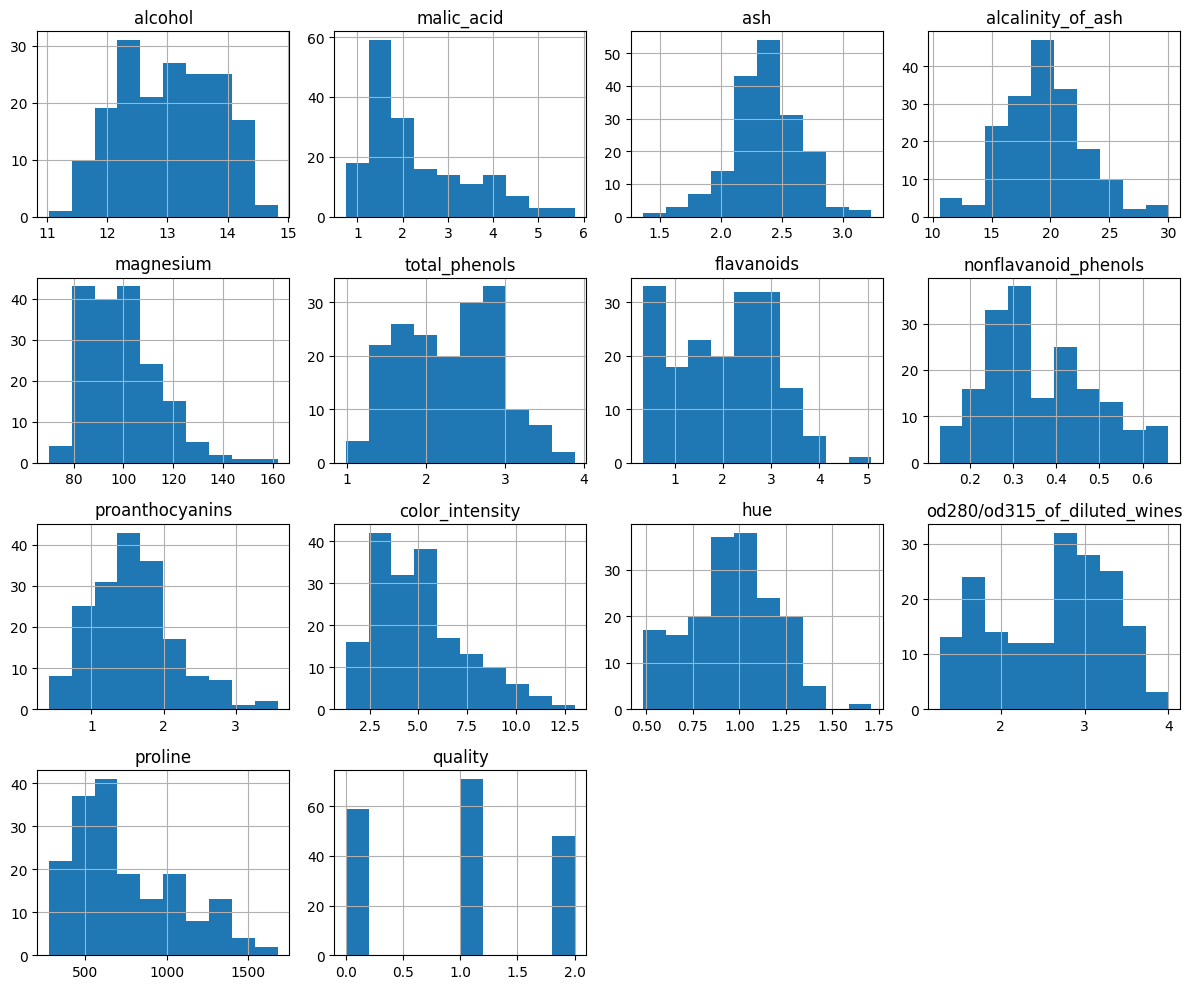

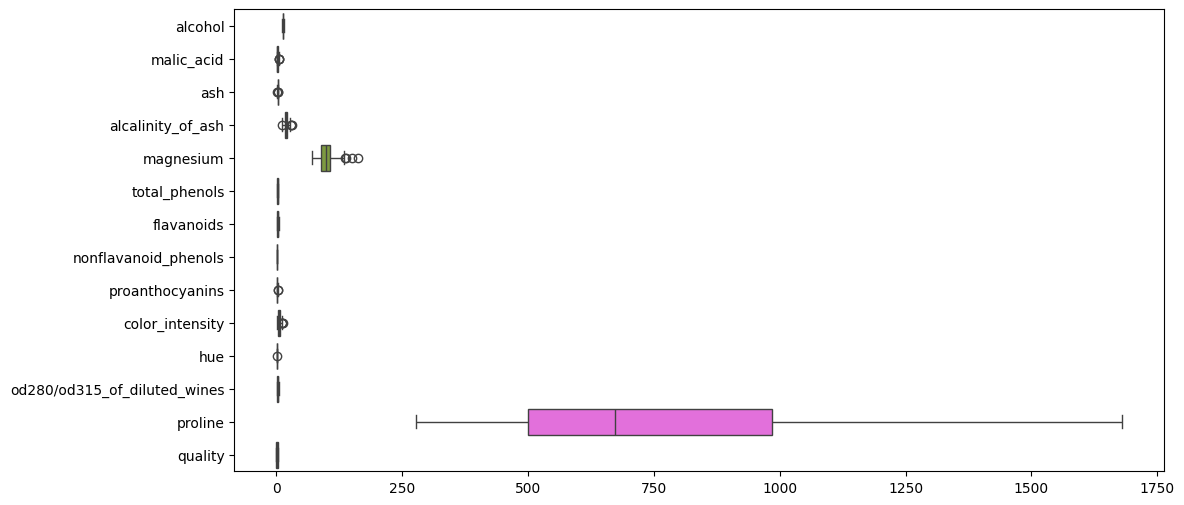

C:\Users\419913\AppData\Local\Temp\ipykernel_6612\3858960231.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)
C:\Users\419913\AppData\Local\Temp\ipykernel_6612\3858960231.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)
C:\Users\419913\AppData\Local\Temp\ipykernel_6612\3858960231.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)
C:\Users\419913\AppData\Local\Temp\ipykernel_6612\3858960231.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update

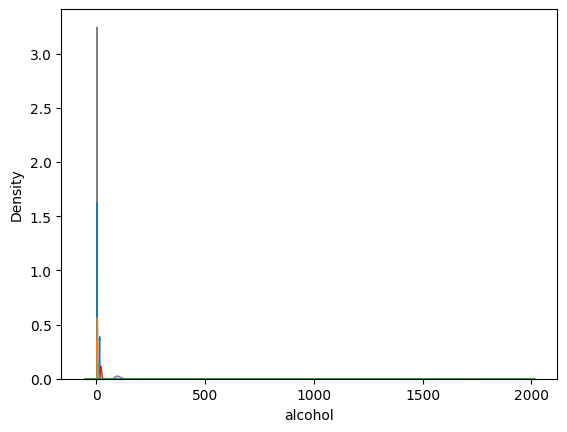

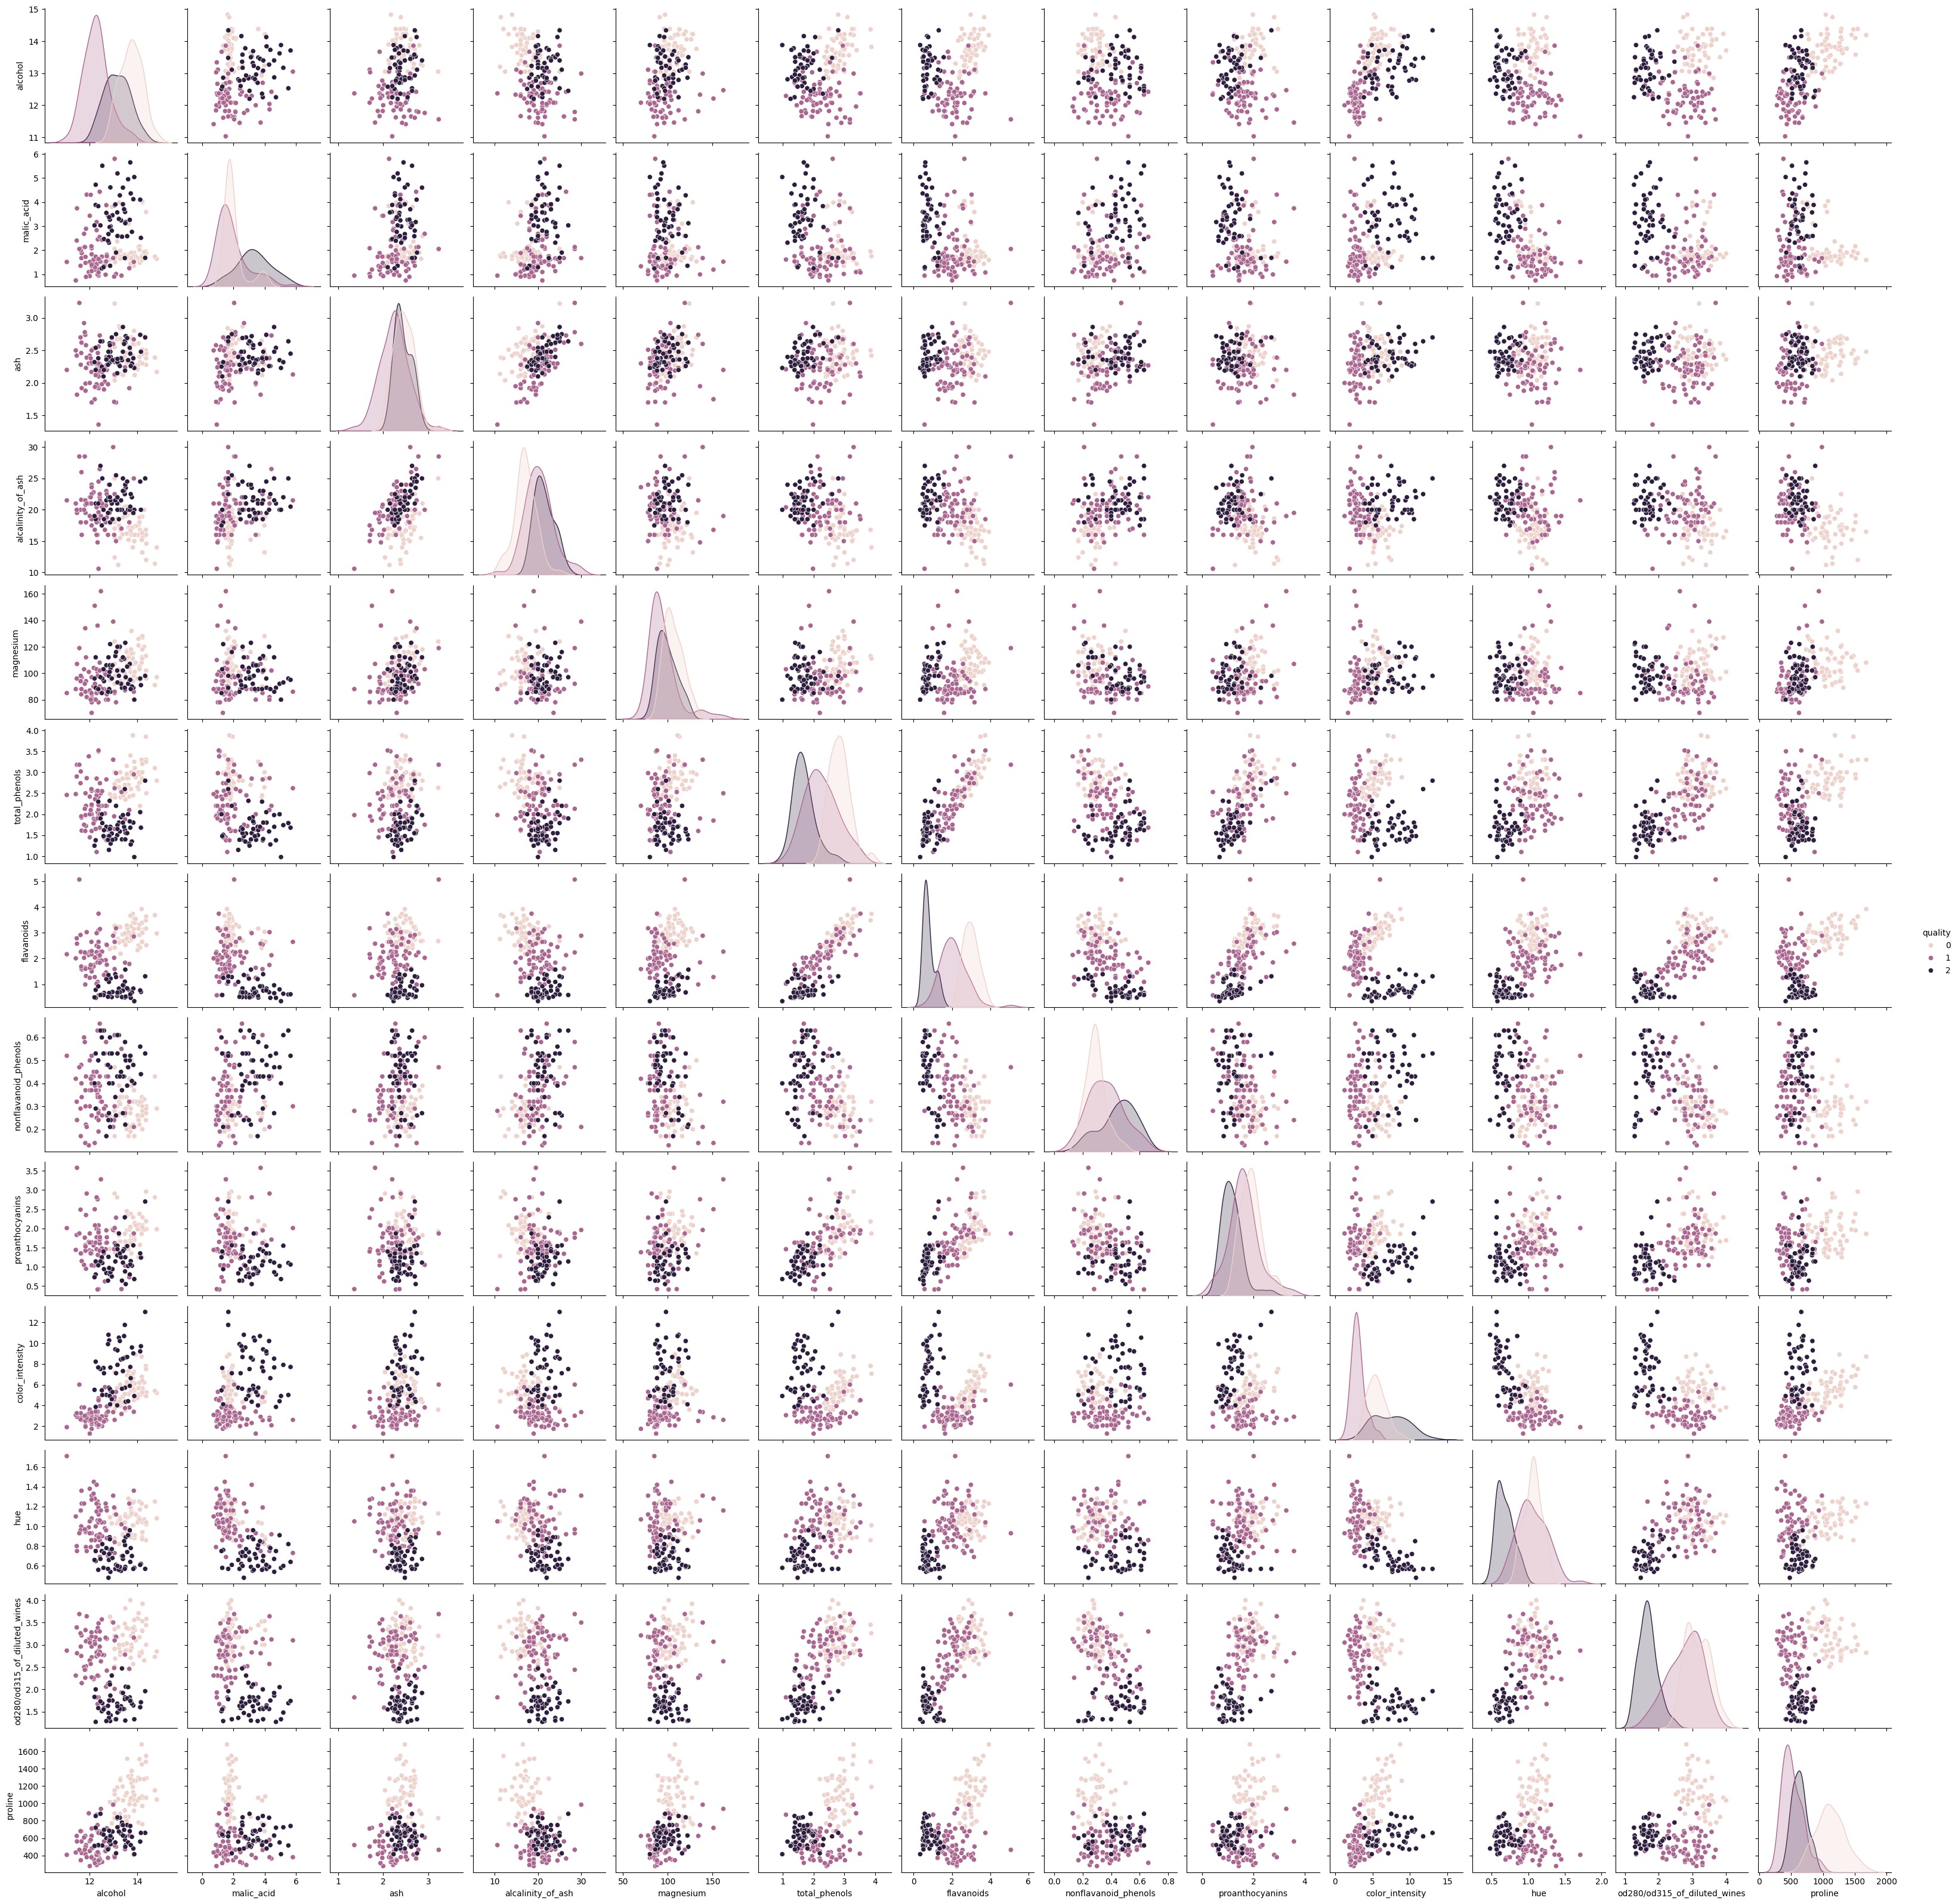

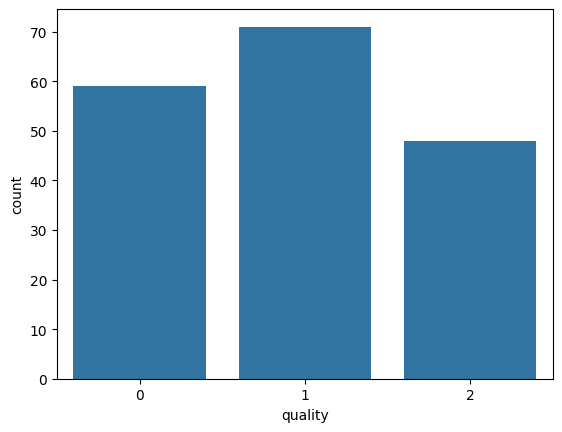

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.show()

# Density plots for individual features
for feature in wine_data.feature_names:
    sns.kdeplot(df[feature], shade=True)
plt.show()

# Scatter plots and pair plots
sns.pairplot(df, hue='quality')
plt.show()

# Distribution of quality labels
sns.countplot(x='quality', data=df)
plt.show()

In [5]:
df.fillna(df.mean(), inplace=True)  # Mean imputation

In [11]:

from imblearn.over_sampling import SMOTE

X = df.drop('quality', axis=1)
y = df['quality']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [12]:
# Normalization/standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      0.92      0.92        12
           2       0.92      0.92      0.92        12

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32

KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.92      0.96        12
           2       0.92      1.

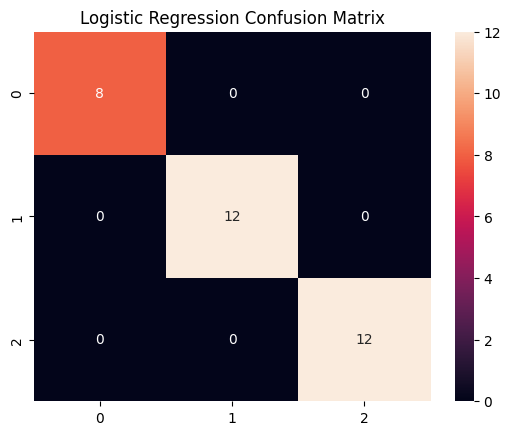

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred_log = log_model.predict(X_val)
y_pred_tree = tree_model.predict(X_val)
y_pred_knn = knn_model.predict(X_val)

# Metrics
print("Logistic Regression:\n", classification_report(y_val, y_pred_log))
print("Decision Tree:\n", classification_report(y_val, y_pred_tree))
print("KNN:\n", classification_report(y_val, y_pred_knn))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_pred_log), annot=True)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [1, 2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10]
}
tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None],
                         'min_samples_split': [2, 5, 10]})

Final model performance:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.90      0.82      0.86        11
           2       1.00      0.91      0.95        11

    accuracy                           0.91        32
   macro avg       0.91      0.91      0.91        32
weighted avg       0.91      0.91      0.91        32



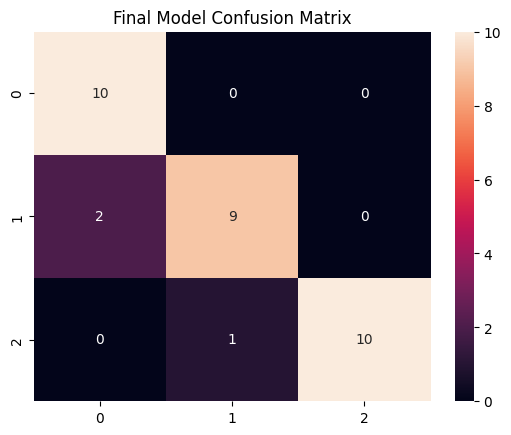

In [17]:
best_tree_model = tree_grid.best_estimator_
y_test_pred = best_tree_model.predict(X_test)
print("Final model performance:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix for Test Set
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
plt.title("Final Model Confusion Matrix")
plt.show()

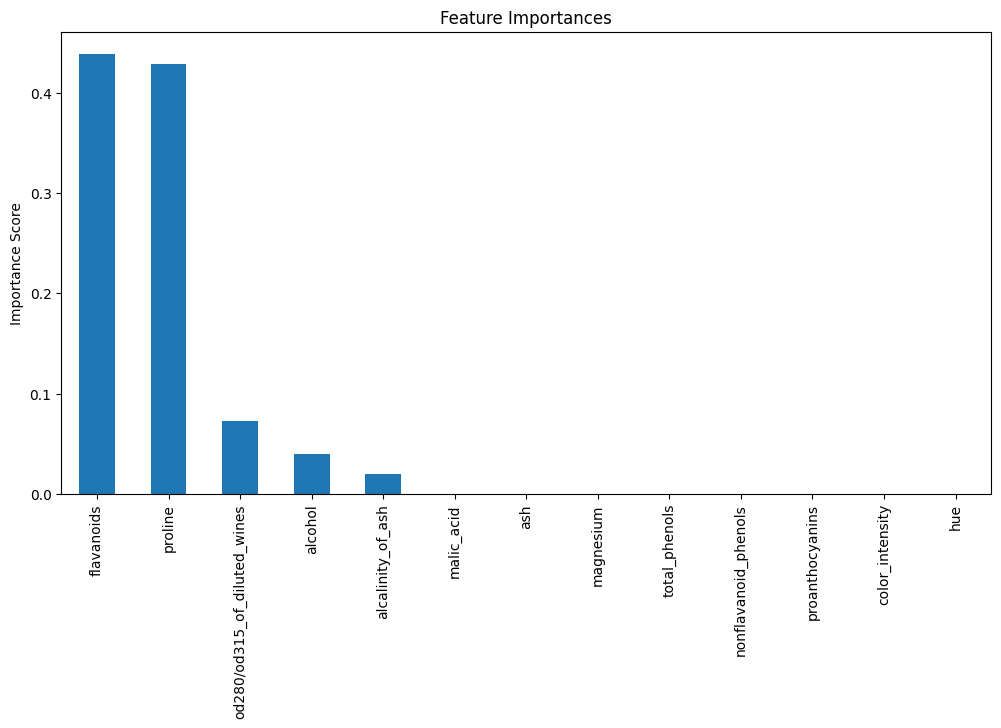

In [18]:
# Feature importance (for Decision Trees)
importances = best_tree_model.feature_importances_
feature_names = wine_data.feature_names
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importances")
plt.ylabel("Importance Score")
plt.show()